In [1052]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [1053]:
pwd

'/Users/chaninderrishi/Desktop/jphackathon'

In [1054]:
path = "/Users/chaninderrishi/Desktop/jphackathon/data/"

In [1055]:
pit = pd.read_csv('data/2007-2021-PIT-Counts-by-CoC.csv')
pit.head()

,CoC Number,CoC Name,CoC Category,Type of Count,"Overall Homeless, 2021","Sheltered ES Homeless, 2021","Sheltered ES Homeless - Under 18, 2021","Sheltered ES Homeless - Age 18 to 24, 2021","Sheltered ES Homeless - Over 24, 2021","Sheltered ES Homeless - Female, 2021",...,"Sheltered ES Homeless Parenting Youth Under 18, 2021","Sheltered TH Homeless Parenting Youth Under 18, 2021","Sheltered Total Homeless Parenting Youth Under 18, 2021","Sheltered ES Homeless Parenting Youth Age 18-24, 2021","Sheltered TH Homeless Parenting Youth Age 18-24, 2021","Sheltered Total Homeless Parenting Youth Age 18-24, 2021","Unsheltered Homeless Parenting Youth Age 18-24, 2021","Sheltered ES Homeless Children of Parenting Youth, 2021","Sheltered TH Homeless Children of Parenting Youth, 2021","Sheltered Total Homeless Children of Parenting Youth, 2021"
0,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and full unsheltered,"1,319",941,51,105,785,242,...,0.0,0.0,0.0,28,15,43,0.0,19,19,38
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered-Only Count,630,419,94,46,279,163,...,0.0,0.0,0.0,7,8,15,0.0,10,13,23
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and full unsheltered,875,349,40,24,285,108,...,0.0,0.0,0.0,3,2,5,0.0,3,2,5
3,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered-Only Count,219,137,49,5,83,69,...,0.0,0.0,0.0,3,1,4,0.0,6,3,9
4,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and partial unsheltered,183,37,0,2,35,11,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0


## EDA

In [1056]:
pit.shape

(392, 354)

In [1057]:
pit.isna().sum()

CoC Number                                                    2
CoC Name                                                      3
CoC Category                                                  4
Type of Count                                                 4
Overall Homeless, 2021                                        3
                                                             ..
Sheltered Total Homeless Parenting Youth Age 18-24, 2021      3
Unsheltered Homeless Parenting Youth Age 18-24, 2021          3
Sheltered ES Homeless Children of Parenting Youth, 2021       3
Sheltered TH Homeless Children of Parenting Youth, 2021       3
Sheltered Total Homeless Children of Parenting Youth, 2021    3
Length: 354, dtype: int64

In [1058]:
# filter for the columns we want to keep
keep_lst = [0, 1, 4, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
selected_cols = [col_lst[i] for i in keep_lst]

## Data pre-processing

In [1059]:
df = pit[selected_cols]
df = df.dropna()
df.head()

,CoC Number,CoC Name,"Overall Homeless, 2021","Sheltered Total Homeless, 2021","Sheltered Total Homeless - Under 18, 2021","Sheltered Total Homeless - Age 18 to 24, 2021","Sheltered Total Homeless - Female, 2021","Sheltered Total Homeless - Male, 2021","Sheltered Total Homeless - Transgender, 2021","Sheltered Total Homeless - Gender Non-Conforming, 2021","Sheltered Total Homeless - Non-Hispanic/Non-Latino, 2021","Sheltered Total Homeless - Hispanic/Latino, 2021","Sheltered Total Homeless - White, 2021","Sheltered Total Homeless - Black or African American, 2021","Sheltered Total Homeless - Asian, 2021","Sheltered Total Homeless - American Indian or Alaska Native, 2021","Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander, 2021","Sheltered Total Homeless - Multiple Races, 2021"
0,AK-500,Anchorage CoC,"1,319","1,167",156,210,364,799,4,0.0,"1,100",67,292,94,9,545,53,174
1,AK-501,Alaska Balance of State CoC,630,630,146,85,258,372,0,0.0,598,32,282,40,18,206,5,79
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",875,556,66,31,173,378,5,0.0,540,16,228,309,1,3,1,14
3,AL-501,Mobile City & County/Baldwin County CoC,219,219,78,6,96,123,0,0.0,218,1,95,116,2,1,0,5
4,AL-502,Florence/Northwest Alabama CoC,183,149,0,2,78,70,0,1.0,18,131,123,26,0,0,0,0


In [1060]:
# convert to string numbers to float
def convert_to_float(stringnum):
    
    stringnum = stringnum.replace(',', '')
    
    # check if string is numeric (a number)
    if stringnum.isnumeric():
        return float(stringnum)
    else:
        # if not, return null
        return np.NaN

In [1061]:
for col in df.columns.to_list()[2:]:
    if col != 'Sheltered Total Homeless - Gender Non-Conforming, 2021':
        df[col] = df[col].apply(convert_to_float)

In [1062]:
# save the original dataframe for later use
df_original = df.copy()

In [1063]:
# standardize the columns (before finding correlation)
for col in df.columns.to_list()[2:]:
    df[col] = (df[col]-df[col].mean())/df[col].std()

In [1064]:
# create 'under 24 sheltered homeless population' feature
df['under 24'] = df['Sheltered Total Homeless - Under 18, 2021'] + df['Sheltered Total Homeless - Age 18 to 24, 2021']
df['under 24']

0      0.417911
1      0.001573
2     -0.251754
3     -0.321431
4     -0.410163
         ...   
383   -0.375691
384   -0.403027
385   -0.368998
386   -0.229271
387   -0.199962
Name: under 24, Length: 388, dtype: float64

In [1065]:
# find proportions of features per total homeless population
for col in df.columns.to_list()[4:]:
    df[col] = df[col] / df['Sheltered Total Homeless, 2021']

## Correlation Matrix

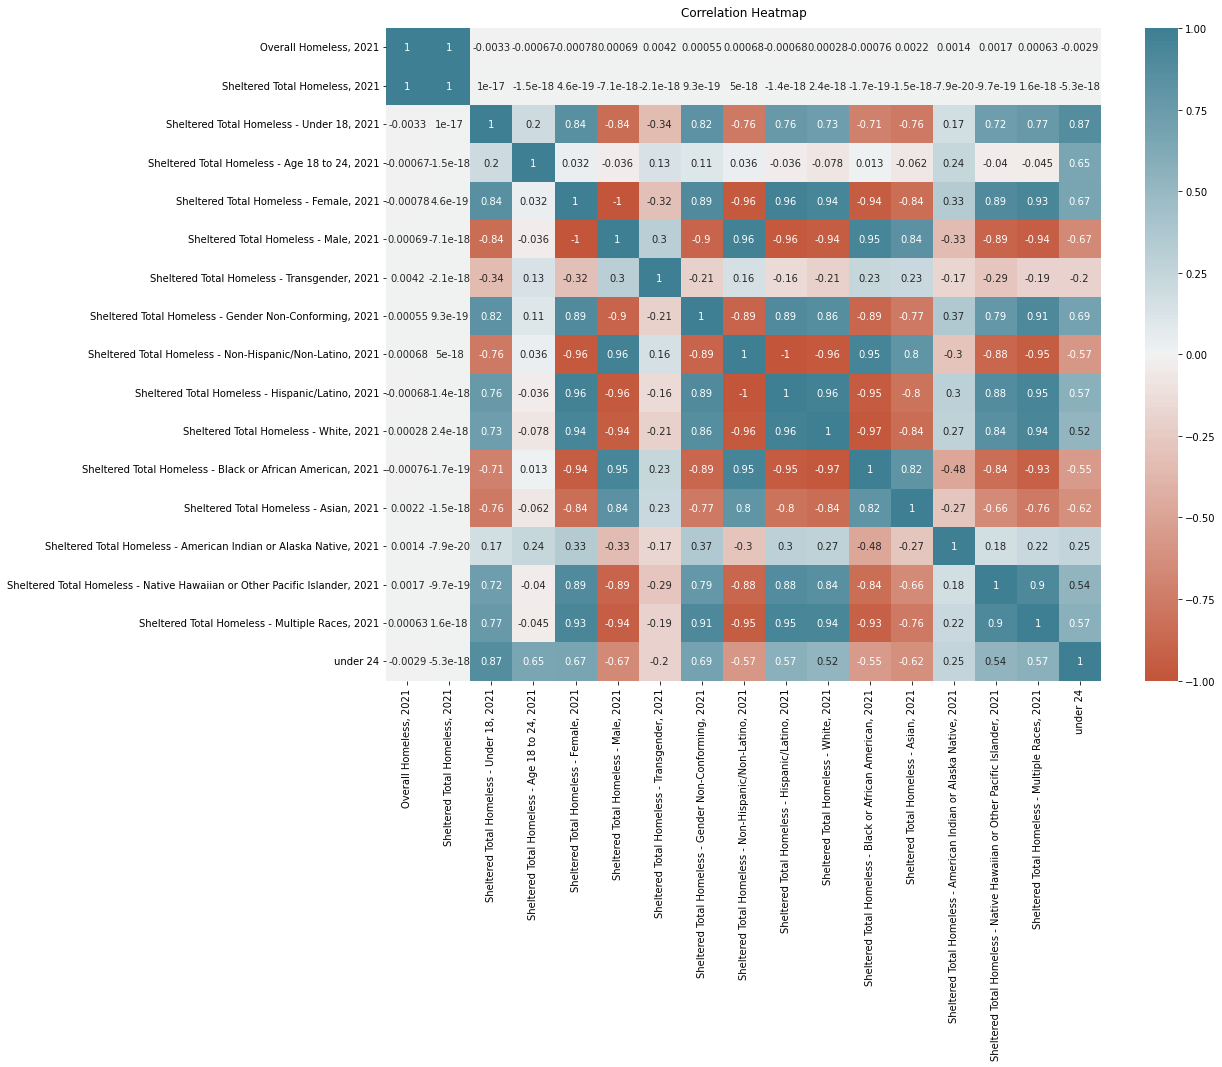

In [1066]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [1067]:
# calculate the correlation matrix and reshape
df_corr = df.corr().stack().reset_index()

# rename columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']

# identify rows with duplicate features as mentioned above
mask_dups = (df_corr[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df_corr['FEATURE_1']==df_corr['FEATURE_2']) 
df_corr = df_corr[~mask_dups]

# determine most important features
top_5_features = df_corr.sort_values(by='CORRELATION', ascending=False)[:5]
top_5_features = top_5_features[1:]
top_5_features

,FEATURE_1,FEATURE_2,CORRELATION
93,"Sheltered Total Homeless - Male, 2021",Sheltered Total Homeless - Non-Hispanic/Non-La...,0.964229
163,"Sheltered Total Homeless - Hispanic/Latino, 2021","Sheltered Total Homeless - White, 2021",0.961861
77,"Sheltered Total Homeless - Female, 2021","Sheltered Total Homeless - Hispanic/Latino, 2021",0.961590
147,Sheltered Total Homeless - Non-Hispanic/Non-La...,Sheltered Total Homeless - Black or African Am...,0.953009


## Scatterplots

Text(0, 0.5, 'Sheltered Total Homeless - Non-Hispanic/Non-Latino')

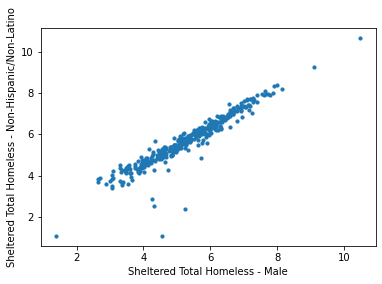

In [1091]:
idx = 0
x = np.log(df_original[top_5_features['FEATURE_1'].iloc[idx]])
y = np.log(df_original[top_5_features['FEATURE_2'].iloc[idx]])

# log transform and plot scatterplot
plt.scatter(x,y, s=10)


plt.xlabel('Sheltered Total Homeless - Male')
plt.ylabel('Sheltered Total Homeless - Non-Hispanic/Non-Latino')

Text(0, 0.5, 'Sheltered Total Homeless - White')

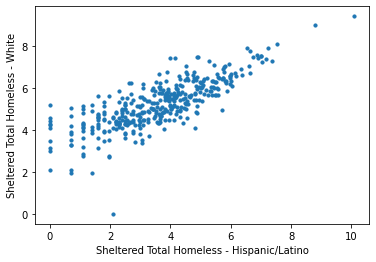

In [1069]:
idx = 1
x = df_original[top_5_features['FEATURE_1'].iloc[idx]]
y = df_original[top_5_features['FEATURE_2'].iloc[idx]]

# log transform and plot scatterplot
plt.scatter(np.log(x), np.log(y), s=10)  

plt.xlabel('Sheltered Total Homeless - Hispanic/Latino')
plt.ylabel('Sheltered Total Homeless - White')

Text(0, 0.5, 'Sheltered Total Homeless - Hispanic/Latino')

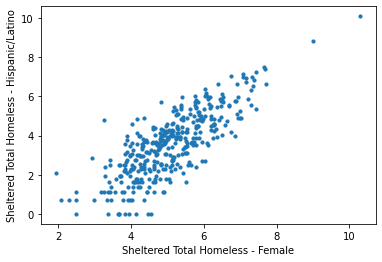

In [1038]:
idx = 2
x = df_original[top_5_features['FEATURE_1'].iloc[idx]]
y = df_original[top_5_features['FEATURE_2'].iloc[idx]]

# log transform and plot scatterplot
plt.scatter(np.log(x), np.log(y), s=10)

plt.xlabel('Sheltered Total Homeless - Female')
plt.ylabel('Sheltered Total Homeless - Hispanic/Latino')

Text(0, 0.5, 'Sheltered Total Homeless - Black or African American')

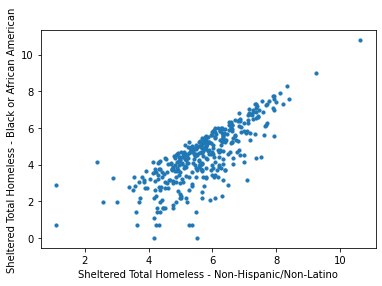

In [1039]:
idx = 3
x = df_original[top_5_features['FEATURE_1'].iloc[idx]]
y = df_original[top_5_features['FEATURE_2'].iloc[idx]]

# log transform and plot scatterplot
plt.scatter(np.log(x), np.log(y), s=10)   

plt.xlabel('Sheltered Total Homeless - Non-Hispanic/Non-Latino')
plt.ylabel('Sheltered Total Homeless - Black or African American')

## Determining expansion locations (CoCs)

In [1040]:
cutoff = np.percentile(df_original['Overall Homeless, 2021'], 75)
cutoff

935.75

In [1041]:
good_indicies = df_original[df_original['Overall Homeless, 2021'] >= cutoff].index.to_list()

In [1042]:
good_df = df.filter(items = good_indicies, axis=0)
good_df

,CoC Number,CoC Name,"Overall Homeless, 2021","Sheltered Total Homeless, 2021","Sheltered Total Homeless - Under 18, 2021","Sheltered Total Homeless - Age 18 to 24, 2021","Sheltered Total Homeless - Female, 2021","Sheltered Total Homeless - Male, 2021","Sheltered Total Homeless - Transgender, 2021","Sheltered Total Homeless - Gender Non-Conforming, 2021","Sheltered Total Homeless - Non-Hispanic/Non-Latino, 2021","Sheltered Total Homeless - Hispanic/Latino, 2021","Sheltered Total Homeless - White, 2021","Sheltered Total Homeless - Black or African American, 2021","Sheltered Total Homeless - Asian, 2021","Sheltered Total Homeless - American Indian or Alaska Native, 2021","Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander, 2021","Sheltered Total Homeless - Multiple Races, 2021",under 24
0,AK-500,Anchorage CoC,0.092609,0.092853,-0.542360,5.043129,-0.004641,1.850590,0.167083,-2.628433,2.137209,-1.022923,-1.043855,-1.234262,-0.211691,100.430810,5.610145,7.831175,4.500770
12,AR-503,Arkansas Balance of State CoC,0.057264,-0.050777,2.349174,0.515823,1.375246,0.647612,3.206989,4.806461,0.235348,2.332231,-1.297858,1.373799,3.061248,3.316288,2.480559,3.676665,2.864998
15,AZ-500,Arizona Balance of State CoC,0.002191,0.042227,-0.433952,-1.698784,0.692018,1.267094,-0.688534,2.541338,1.290426,0.470923,5.501688,-2.875228,-1.537354,77.269341,-2.982820,11.609336,-2.132736
17,AZ-502,"Phoenix, Mesa/Maricopa County CoC",0.731293,0.799061,1.007293,0.655236,0.979313,1.023607,0.298425,0.354165,1.135830,0.743653,2.391403,0.407808,0.740092,3.593888,0.016978,1.488889,1.662529
18,CA-500,San Jose/Santa Clara City & County CoC,0.361673,0.415382,0.399925,0.532136,0.755360,1.192642,0.466728,5.333754,0.534262,1.804903,2.971782,-0.075393,7.743625,4.345453,1.498359,2.918461,0.932061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,WA-500,Seattle/King County CoC,1.151328,1.235072,0.879634,0.945432,0.939578,1.038691,1.131736,3.074089,1.349198,0.367241,1.894217,0.499220,1.889735,2.641840,1.828727,1.753424,1.825066
374,WA-501,Washington Balance of State CoC,0.679781,0.745590,0.862095,0.937831,1.008927,0.983956,1.037471,2.500266,1.266001,0.514012,3.715857,-0.063485,0.702109,5.210784,0.783728,1.043361,1.799926
375,WA-502,Spokane City & County CoC,0.003013,0.043080,-0.853501,0.977753,0.268252,1.485067,9.675305,6.569105,2.313606,-1.334113,10.061653,-2.511551,-0.981587,17.550707,1.787027,1.689749,0.124252
376,WA-503,"Tacoma, Lakewood/Pierce County CoC",0.006574,0.046778,0.313859,0.274586,0.705621,1.244563,0.331658,2.294110,1.941352,-0.677404,3.277227,-1.431335,1.031184,8.562197,12.220674,16.147742,0.588445


In [1043]:
good_df = good_df.filter(items=top_5_features['FEATURE_2'].to_list())
good_df.head()

,"Sheltered Total Homeless - Non-Hispanic/Non-Latino, 2021","Sheltered Total Homeless - White, 2021","Sheltered Total Homeless - Hispanic/Latino, 2021","Sheltered Total Homeless - Black or African American, 2021"
0,2.137209,-1.043855,-1.022923,-1.234262
12,0.235348,-1.297858,2.332231,1.373799
15,1.290426,5.501688,0.470923,-2.875228
17,1.135830,2.391403,0.743653,0.407808
18,0.534262,2.971782,1.804903,-0.075393


In [1044]:
def scale_neg1_to_1():
    for col in good_df.columns:
        good_df[col] = good_df[col] / np.max(good_df[col])

In [1045]:
scale_neg1_to_1()

In [1046]:
good_df['score'] = good_df.sum(axis=1)
good_df

,"Sheltered Total Homeless - Non-Hispanic/Non-Latino, 2021","Sheltered Total Homeless - White, 2021","Sheltered Total Homeless - Hispanic/Latino, 2021","Sheltered Total Homeless - Black or African American, 2021",score
0,0.118931,-0.003304,-0.005337,-0.058060,0.052230
12,0.013097,-0.004108,0.012169,0.064623,0.085781
15,0.071810,0.017414,0.002457,-0.135251,-0.043570
17,0.063207,0.007569,0.003880,0.019183,0.093839
18,0.029731,0.009406,0.009418,-0.003546,0.045008
...,...,...,...,...,...
373,0.075080,0.005995,0.001916,0.023483,0.106475
374,0.070450,0.011761,0.002682,-0.002986,0.081907
375,0.128747,0.031847,-0.006961,-0.118143,0.035490
376,0.108032,0.010373,-0.003535,-0.067330,0.047541


In [1047]:
ranked_cocs = good_df.sort_values(by='score', ascending=False)
# ranked_cocs['score']

ranked_cocs_indicies = good_df.sort_values(by='score', ascending=False).index.to_list()

In [1048]:
cocs_sorted = df.filter(items=ranked_cocs_indicies, axis=0)
cocs_sorted.head(20)[['CoC Number', 'CoC Name']].reset_index(drop=True)

,CoC Number,CoC Name
0,NM-501,New Mexico Balance of State CoC
1,CO-500,Colorado Balance of State CoC
2,OH-500,Cincinnati/Hamilton County CoC
3,CA-510,"Turlock, Modesto/Stanislaus County CoC"
4,FL-510,"Jacksonville-Duval, Clay Counties CoC"
5,MA-511,"Quincy, Brockton, Weymouth, Plymouth City and ..."
6,MI-501,Detroit CoC
7,IL-511,Cook County CoC
8,TX-503,Austin/Travis County CoC
9,TN-504,Nashville-Davidson County CoC


In [1049]:
coc_to_county = pd.read_csv('data/geography mappings/CoC_county_mapping.csv')
coc_to_county = coc_to_county[['CoC Number', 'County Name']]
coc_to_county.head()

,CoC Number,County Name
0,AK-500,Anchorage Municipality
1,AK-501,Aleutians East Borough
2,AK-501,Aleutians West Census Area
3,AK-501,Bethel Census Area
4,AK-501,Bristol Bay Borough


In [1050]:
cocs_sorted['score'] = ranked_cocs['score']
cocs_sorted.head()

,CoC Number,CoC Name,"Overall Homeless, 2021","Sheltered Total Homeless, 2021","Sheltered Total Homeless - Under 18, 2021","Sheltered Total Homeless - Age 18 to 24, 2021","Sheltered Total Homeless - Female, 2021","Sheltered Total Homeless - Male, 2021","Sheltered Total Homeless - Transgender, 2021","Sheltered Total Homeless - Gender Non-Conforming, 2021","Sheltered Total Homeless - Non-Hispanic/Non-Latino, 2021","Sheltered Total Homeless - Hispanic/Latino, 2021","Sheltered Total Homeless - White, 2021","Sheltered Total Homeless - Black or African American, 2021","Sheltered Total Homeless - Asian, 2021","Sheltered Total Homeless - American Indian or Alaska Native, 2021","Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander, 2021","Sheltered Total Homeless - Multiple Races, 2021",under 24,score
253,NM-501,New Mexico Balance of State CoC,0.054524,-0.006408,2.708064,-0.989114,-6.233820,7.255865,-9.379155,-44.162238,17.970118,-28.954422,-14.767976,21.258518,13.662067,-700.601574,17.676174,0.964225,1.718950,1.802180
62,CO-500,Colorado Balance of State CoC,0.086033,-0.020913,3.336386,2.652338,2.735701,-0.330298,3.522322,-47.134458,1.058551,0.879982,-13.627589,6.494767,8.514743,-34.453149,6.022725,-1.322932,5.988724,0.325878
281,OH-500,Cincinnati/Hamilton County CoC,0.009588,0.041089,0.097426,-0.004081,0.342668,1.595250,-1.792769,-5.939693,3.428242,-3.300489,-2.213199,2.580449,-4.884550,-6.261569,-3.065408,-1.523235,0.093345,0.287933
28,CA-510,"Turlock, Modesto/Stanislaus County CoC",0.533194,-0.032575,0.979762,1.403255,0.749221,1.154157,4.999058,2.098961,2.188964,-1.114226,-5.772052,3.665761,-7.038742,4.077874,0.751663,-4.485958,2.383017,0.270165
80,FL-510,"Jacksonville-Duval, Clay Counties CoC",0.066031,0.043080,0.070389,-2.269227,-0.625092,2.335806,0.360123,6.569105,3.156710,-2.821467,-0.721355,2.052222,-2.557542,-5.559514,-2.040473,-2.369429,-2.198838,0.255196


In [1051]:
cocs_sorted[['CoC Number', 'CoC Name', 'score']]

,CoC Number,CoC Name,score
253,NM-501,New Mexico Balance of State CoC,1.802180
62,CO-500,Colorado Balance of State CoC,0.325878
281,OH-500,Cincinnati/Hamilton County CoC,0.287933
28,CA-510,"Turlock, Modesto/Stanislaus County CoC",0.270165
80,FL-510,"Jacksonville-Duval, Clay Counties CoC",0.255196
...,...,...,...
154,MA-506,Worcester City & County CoC,-0.091377
58,CA-611,"Oxnard, San Buenaventura/Ventura County CoC",-0.217983
91,FL-601,Ft Lauderdale/Broward County CoC,-0.220589
343,TX-601,"Fort Worth, Arlington/Tarrant County CoC",-0.409859
